# Thomas Calculus
## Chapter 13 Vector-Valued Functions and Motion in Space
### 13.1 Curves in Space and Their Tangents 
#### Motion in the Plane
#### Motion in Space
#### Tangents to Curves
#### Theory and Examples
#### COMPUTER EXPLORATIONS
Use a CAS to perform the following steps in Exercises 49–52.  
a. Plot the space curve traced out by the position vector $\mathbf{r}$.
b. Find the components of the velocity vector $\dfrac{d\mathbf{r}}{dt}$.    
c. Evaluate $\dfrac{d\mathbf{r}}{dt}$ at the given point $t_0$ and determine the equation of the tangent line to the curve at $\mathbf{r}(t_0).$  
d. Plot the tangent line together with the curve over the given interval.  

49. $\mathbf{r}(t) =(\sin t - t\cos t)\mathbf{i} + (\cos t + t\sin t )\mathbf{j} + t^2 \mathbf{k}, t_0 = \dfrac{3}{2}\pi$  

In [2]:
from matplotlib import pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

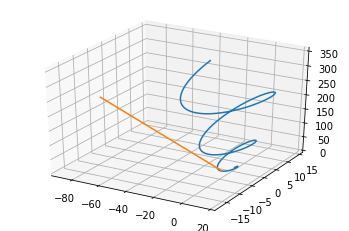

In [5]:
t = np.linspace(0,6*np.pi,201)
x = np.sin(t) - t*np.cos(t)
y = np.cos(t) + t*np.sin(t) 
z = t**2
x2 = 1 - (3/2)*np.pi*t
y2 = np.linspace(-(3/2)*np.pi,-(3/2)*np.pi,201)
z2 = (9/4)*(np.pi**2) + 3*np.pi*t
ax = plt.axes(projection = '3d')
ax.plot(x,y,z)
ax.plot(x2,y2,z2)


### 13.4 Curvature and Normal Vectors of a Curve
#### Plane Curves
#### Space Curves
#### More on Curvature  
### COMPUTER EXPLORATIONS
In Exercises 31–38 you will use a CAS to explore the osculating circle at a point $P$ on a plane curve where $\kappa \ne 0$. Use a CAS to perform the following steps:  
a. Plot the plane curve given in parametric or function form over the specified interval to see what it looks like.  
b. Calculate the curvature $\kappa$ of the curve at the given value $t_0$ using the appropriate formula from Exercise 5 or 6. Use the parametrization $x = t$ and $y = f(t)$ if the curve is given as a function $y = f(x)$.  
c. Find the unit normal vector $\mathbf{N}$ at $t_0$ . Notice that the signs of the components of $\mathbf{N}$ depend on whether the unit tangent vector $\mathbf{t}$ is turning clockwise or counterclockwise at $t = t_0$. (See Exercise 7.)  
d. If $\mathbf{C} = ai + bj$ is the vector from the origin to the center $(a, b)$ of the osculating circle, find the center $\mathbf{C}$ from the vector equation  
$$
\mathbf{C} = \mathbf{r}t_0 + \dfrac{1}{\kappa(t_0)}\mathbf{N}(t_0)
$$
The point $P(x_0, y_0)$ on the curve is given by the position vector $\mathbf{r}t_0$.  
e. Plot implicitly the equation $(x - a)^2 + (y - b)^2 =\dfrac{1}{\kappa^2}$ of the osculating circle. Then plot the curve and osculating circle together. You may need to experiment with the size of the viewing window, but be sure the axes are equally scaled.  

31. $\mathbf{r}(t) = 3\cos t\mathbf{i} + 5\sin t\mathbf{j}, 0 \le t \le 2\pi, t_0 = \dfrac{\pi}{4}$  

In [3]:
class FunctionPlotter():
    def __init__(self,function,
    domain=0,CustomDomain=None,
    ticks=[np.linspace(-5,5,5),np.linspace(-5,5,5)],
    lim=[(-5,5),(-5,5)]):
        '''
        params: 
        function: the function to be plotted
        domain: the range of x 
                default: 0: [-5,5]
                1:[0,10]
                2:[-10,0]
                or other array like value of x
        '''
        self.function = function
        self.xticks, self.yticks = ticks[0],ticks[1]
        self.xlim,self.ylim = lim[0],lim[1]
        if domain == 0 :
            self.x = np.linspace(-5,5,101)
        elif domain == 1:
            self.x = np.linspace(0,10,101)
        elif domain == 2:
            self.x = np.linspace(-10,0,101)
        elif domain == 3:
            self.x = CustomDomain
    def canvas(self):
        self.fig,self.ax = plt.subplots()
        self.ax.spines["left"].set_position(("axes", 0.5))
        self.ax.spines["bottom"].set_position(("axes", 0.5))
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        #self.ax.plot(1, 0, ">k", transform=self.ax.get_yaxis_transform(), clip_on=False)
        #self.ax.plot(0, 1, "^k", transform=self.ax.get_xaxis_transform(), clip_on=False)
        self.ax.set_xlabel('x',x=1)
        self.ax.set_ylabel('y',y=1)
        self.ax.set_xticks(self.xticks)
        self.ax.set_yticks(self.yticks)
        self.ax.set_xlim(self.xlim)
        self.ax.set_ylim(self.ylim)
    def plot(self):
        self.y = self.function(self.x)
        self.canvas()
        self.ax.plot(self.x,self.y)
    def PlotMultiFunction(self):
        self.y = [function(self.x) for function in self.function]
        self.canvas()
        for i in range(len(self.function)):
            self.ax.plot(self.x,self.y[i],label='f({})'.format(i+1))
            self.ax.legend()
    def PlotContour(self):
        self.y = self.x
        X,Y = np.meshgrid(self.x,self.y)
        self.canvas()
        self.ax.contour(X,Y,f(X,Y),0)

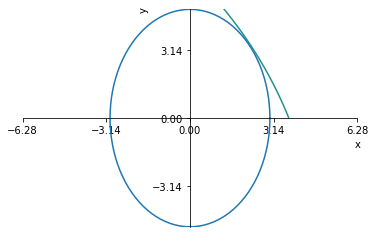

In [6]:
t = np.linspace(0,2*np.pi,101) 
x = 3*np.cos(t)
y = 5*np.sin(t)
def f(a,b):
    return (a - (15*np.sqrt(2)-85*np.sqrt(34))/30)**2 + (b - (75*np.sqrt(2)-51*np.sqrt(34))/30)**2 - 17**3/(15**2)
pter = FunctionPlotter(f, domain=3,CustomDomain=t,
    ticks=[np.linspace(-2*np.pi,2*np.pi,5),np.linspace(-2*np.pi,2*np.pi,5)],
    lim=[(-2*np.pi,2*np.pi),(-5,5)])  
#pter.canvas()
pter.PlotContour()
pter.ax.plot(x,y)